In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/data-visualizatiion/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = OneHotEncoder()

for i in([['sex'], ['smoker'], ['region']]):
    df[i] = encoder.fit_transform(df[i])
df

,age,sex,bmi,children,smoker,region,charges
0,19,"(0, 0)\t1.0",27.900,0,"(0, 1)\t1.0","(0, 3)\t1.0",16884.92400
1,18,"(0, 1)\t1.0",33.770,1,"(0, 0)\t1.0","(0, 2)\t1.0",1725.55230
2,28,"(0, 1)\t1.0",33.000,3,"(0, 0)\t1.0","(0, 2)\t1.0",4449.46200
3,33,"(0, 1)\t1.0",22.705,0,"(0, 0)\t1.0","(0, 1)\t1.0",21984.47061
4,32,"(0, 1)\t1.0",28.880,0,"(0, 0)\t1.0","(0, 1)\t1.0",3866.85520
...,...,...,...,...,...,...,...
1333,50,"(0, 1)\t1.0",30.970,3,"(0, 0)\t1.0","(0, 1)\t1.0",10600.54830
1334,18,"(0, 0)\t1.0",31.920,0,"(0, 0)\t1.0","(0, 0)\t1.0",2205.98080
1335,18,"(0, 0)\t1.0",36.850,0,"(0, 0)\t1.0","(0, 2)\t1.0",1629.83350
1336,21,"(0, 0)\t1.0",25.800,0,"(0, 0)\t1.0","(0, 3)\t1.0",2007.94500


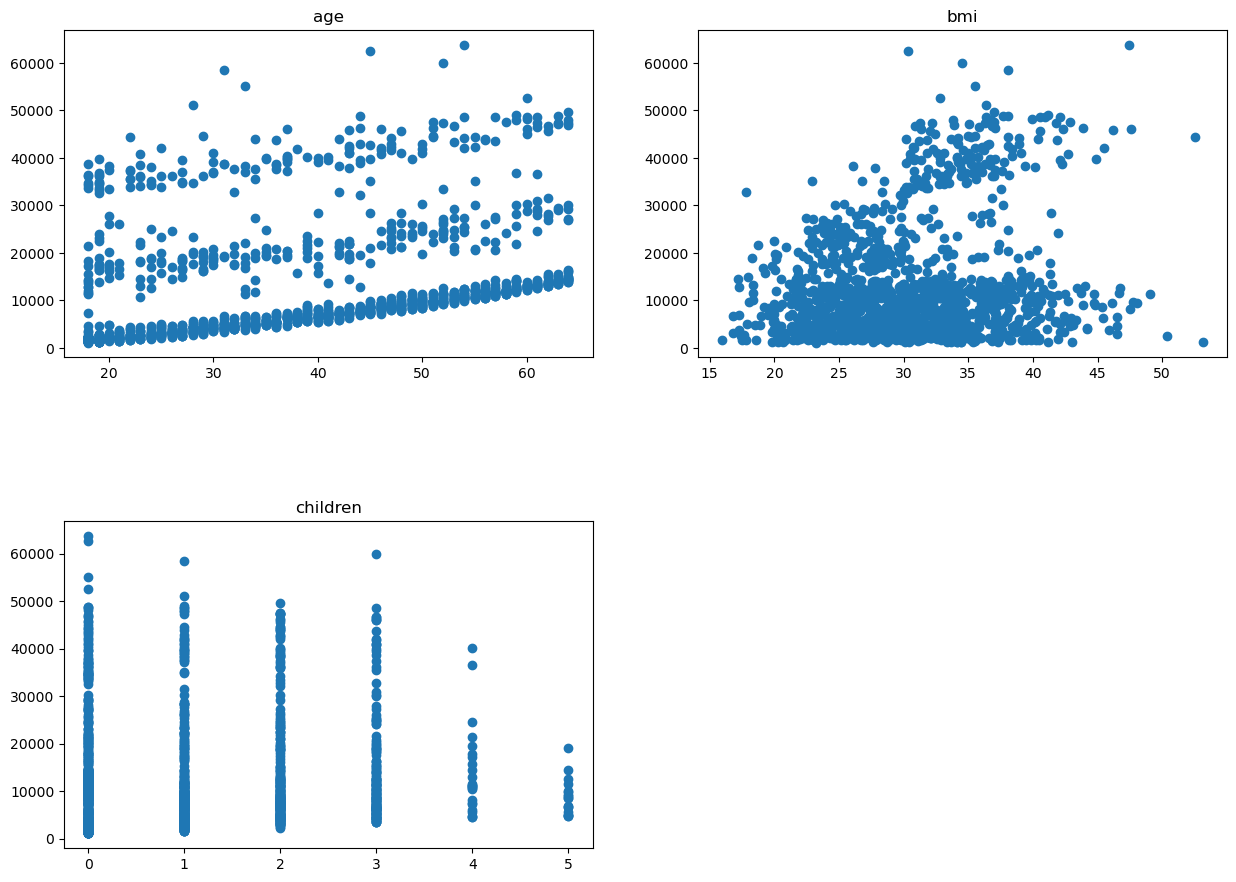

In [8]:
plt.figure(figsize=(15,17))
plt.subplots_adjust(hspace=0.5)

for n, ticker in enumerate(df.columns.drop(['charges', 'sex', 'smoker', 'region'])):
    ax = plt.subplot(3, 2, n+1)
    ax.scatter(df[ticker], df['charges'])
    ax.set_title(ticker)
plt.show() 


In [9]:
X = df.drop(['charges', 'children', 'sex', 'smoker', 'region'], axis=1)
y = df['charges']

In [10]:
from scipy.stats import chi2_contingency
import operator

pvalue = dict()

for i in X.columns:
    contigency = pd.crosstab(df[i], df['charges'])
    _,p,_,_ = chi2_contingency(contigency)
    pvalue[i] = p
    
sorted_pvalues = sorted(pvalue.items(), key=operator.itemgetter(1), reverse=True)
sorted_pvalues

[('age', 0.3958180199236666), ('bmi', 0.18272996423316185)]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize

sc = StandardScaler()
X_train = normalize(X_train)
X_test = normalize(X_test)

In [13]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [14]:
names = ['svm', 'Decision tree', 'gradiant boosting']

classifiers = [SVR(kernel='linear', C=5.1),
               DecisionTreeRegressor(max_depth=5),
               GradientBoostingRegressor(loss='absolute_error', learning_rate=0.06499999999)]

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import KFold

mse = mean_absolute_error

cv = KFold(n_splits=5, random_state=42 ,shuffle=True)
for classifier, name in zip(classifiers, names):
    classifier = make_pipeline(sc, classifier)
    for tr_i, te_i in cv.split(X, y):
        X_train, X_test = X.loc[tr_i], X.loc[te_i]
        y_train, y_test = y[tr_i], y[te_i]
            
        classifier.fit(X_train, y_train)
        score = mse(classifier.predict(X_test), y_test)
        print(f'classifier name: {name} \nclassifier score: {score}\n\n')
    print('--------------------------------------------------------------')


classifier name: svm 
classifier score: 7166.957477081565


classifier name: svm 
classifier score: 7146.4441193589355


classifier name: svm 
classifier score: 7713.748256144505


classifier name: svm 
classifier score: 6417.276075512846


classifier name: svm 
classifier score: 7085.437099903136


--------------------------------------------------------------
classifier name: Decision tree 
classifier score: 9209.215194481323


classifier name: Decision tree 
classifier score: 9222.231185639486


classifier name: Decision tree 
classifier score: 9398.585182120163


classifier name: Decision tree 
classifier score: 8635.238249175836


classifier name: Decision tree 
classifier score: 9140.968726492474


--------------------------------------------------------------
classifier name: gradiant boosting 
classifier score: 6606.315211520477


classifier name: gradiant boosting 
classifier score: 6926.015181228895


classifier name: gradiant boosting 
classifier score: 7396.023015332389


c